<h1 style="text-align: center">
Machine Learning </br>
MLE & MAP in Python
</h1>


**مبینا سلیمی پناه - ۹۹۱۰۹۷۸۸**

## Objective
This exercise will help you gain a deeper understanding of, and insights into, Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) estimation$\textit{Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) }$ :) \\
Let’s say you have a barrel of apples that are all different sizes. You pick an apple at random, and you want to know its weight. Unfortunately, all you have is a broken scale. answer the questions below.

1) For the sake of this section, lets imagine a farmer tells you that the scale returns the weight of the object with an error of +/- a standard deviation of 5g. We can describe this mathematically as:
$$
measurement = weight + \mathcal{N}(0, 5g)
$$
You can weigh the apple as many times as you want, so weigh it 100 times.
plot its histogram of your 100 measurements. (y axis is the counts and x-axis is the measured weight)

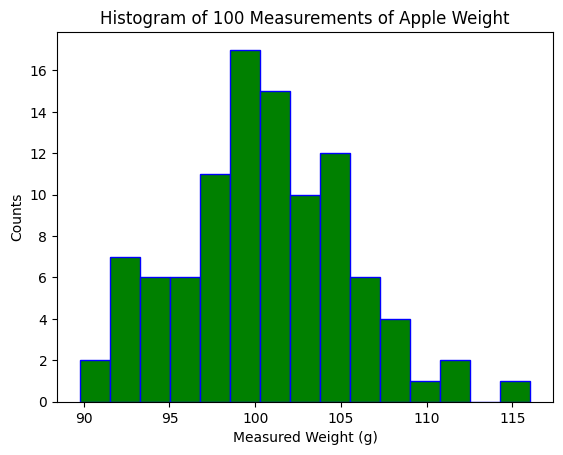

In [1]:
        ###################### TO DO #########################
import numpy as np
import matplotlib.pyplot as plt

true_weight = 100
N = np.random.normal(true_weight, 5, 100)


plt.hist(N, bins=15, color='green', edgecolor='blue')
plt.xlabel('Measured Weight (g)')
plt.ylabel('Counts')
plt.title('Histogram of 100 Measurements of Apple Weight')
plt.show()


2) Find the average weight of the apple.
Is it a good guess? state your reason.

In [2]:
        ###################### TO DO #########################

measurements = np.random.normal(true_weight, 5, 100)

average_weight = np.mean(measurements)
average_weight


100.43236898753237

3) we are going to use grid approximation for calculating the MLE. here is the link if you wnat to get more fimilar with this technique:
https://www.bayesrulesbook.com/chapter-6

Our end goal is to find the weight of the apple, given the data we have. To formulate it in a Bayesian way: We’ll ask what is the probability of the apple having weight, $w$, given the measurements we took, $X$. And, because we're formulating this in a Bayesian way, we use Bayes’ Law to find the answer:

$$
P(w|X) = \frac{P(X|w)P(w)}{P(X)}
$$

If we make no assumptions about the initial weight of our apple, then we can drop $P(w)$. We’ll say all sizes of apples are equally likely (we’ll revisit this assumption in the MAP approximation).

Furthermore, we’ll drop $P(X)$ - the probability of seeing our data. This is a normalization constant and will be important if we do want to know the probabilities of apple weights. But, for right now, our end goal is to only to find the most probable weight. $P(X)$ is independent of $w$, so we can drop it if we’re doing relative comparisons.

This leaves us with $P(X|w)$, our likelihood, as in, what is the likelihood that we would see the data, $X$, given an apple of weight $w$. If we maximize this, we maximize the probability that we will guess the right weight.

The grid approximation is probably the simplest way to do this. Basically, we’ll systematically step through different weight guesses, and compare what it would look like if this hypothetical weight were to generate data. We’ll compare this hypothetical data to our real data and pick the one that matches the best.

To formulate this mathematically:

For each of these guesses, we’re asking "what is the probability that the data we have, came from the distribution that our weight guess would generate". Because each measurement is independent from another, we can break the above equation down into finding the probability on a per measurement basis:

$$
P(X|w) = \prod_{i}^{N} p(x_i|w)
$$

So, if we multiply the probability that we would see each individual data point - given our weight guess - then we can find one number comparing our weight guess to all of our data.

The peak in the likelihood is the weight of the apple.

To make it computationally easier,

$$
\log P(X|w) = \log \prod_{i}^{N} p(x_i|w) = \sum_{i}^{N} \log p(d_i|w)
$$



a) Why did we use log likelihood? Is it ok to do so?

b) do the grid approximation and complete the cell below

In [3]:
from scipy.stats import norm
import numpy as np


###################### TO DO #########################


weight_grid = np.linspace(0, 200, 500)

log_likelihoods = np.zeros_like(weight_grid)

for i, weight_guess in enumerate(weight_grid):

    log_pdf = norm.logpdf(measurements, loc=weight_guess, scale=10)
    log_likelihoods[i] = np.sum(log_pdf)

max_likelihood_weight = weight_grid[np.argmax(log_likelihoods)]
print("mle_estimate : ", max_likelihood_weight)
print("max_log_liklihood :", max(log_likelihoods))


# Calculate the maximum likelihood estimate of a parameter in a normal distribution.
# First calculate the log likelihoods for a range of weight guesses.
# For each weight guess, assume that the data comes from a normal distribution with that mean and a standard deviation of 10.
# Then calculate the log of the probability density function (pdf) of the data under this assumption.
# The sum of these log pdf values is the total log likelihood for that weight guess.
# After calculating the log likelihoods for all weight guesses, find the weight guess with the maximum log likelihood.
# This is the maximum likelihood estimate of the weight.


mle_estimate :  100.60120240480963
max_log_liklihood : -334.6817290194882


Play around with the code and try to answer the following questions regarding MLE and MAP. You can draw plots to visualize as well.

In [4]:
import numpy as np
from scipy.stats import norm, invgamma


BARREL = np.random.normal(loc=85, scale=20, size=100)
WEIGHT_GUESSES = np.linspace(1, 200, 100)
ERROR_GUESSES = np.linspace(.1, 50, 100)
SCALE_ERR = 5
N_MEASURMENTS = 10
PRIOR_WEIGHT = norm(50, 1).logpdf(WEIGHT_GUESSES)
PRIOR_ERR = invgamma(4).logpdf(ERROR_GUESSES)
LOG_PRIOR_GRID = np.add.outer(PRIOR_ERR, PRIOR_WEIGHT)


def read_scale(apple):
    return apple + np.random.normal(loc=0, scale=SCALE_ERR)


def get_log_likelihood_grid(measurments, ERROR_GUESSES, ):
    log_liklelihood = [
        [
            norm(weight_guess, error_guess).logpdf(measurments).sum()
            for weight_guess in WEIGHT_GUESSES
        ]
        for error_guess in ERROR_GUESSES
    ]
    return np.asarray(log_liklelihood)


def get_mle(measurments, ERROR_GUESSES):
    ###################### TO DO #########################
    ll_grid = get_log_likelihood_grid(measurments, ERROR_GUESSES)
    ml_index = np.unravel_index(np.argmax(ll_grid, axis=None), ll_grid.shape)
    mle_guess = WEIGHT_GUESSES[ml_index[1]]
    return mle_guess

    """
    Calculate the log-likelihood for each measurement in the grid.
    Find the index of the maximum log-likelihood in the grid.
    Return the weight guess corresponding to the maximum log-likelihood.
    """


def get_map(measurments, ERROR_GUESSES):

    ###################### TO DO #########################
    ll_grid = get_log_likelihood_grid(measurments, ERROR_GUESSES)
    log_posterior_grid = ll_grid + LOG_PRIOR_GRID
    map_index = np.unravel_index(np.argmax(log_posterior_grid, axis=None), log_posterior_grid.shape)
    map_guess = WEIGHT_GUESSES[map_index[1]]
    return map_guess

    """
    Calculate the log-likelihood for each measurement in the grid.
    Add the log prior to the log likelihood to get the log posterior.
    Find the index of the maximum log posterior in the grid.
    Return the weight guess corresponding to the maximum log posterior.
    """
apple = np.random.choice(BARREL)
measurments = np.asarray([read_scale(apple) for _ in range(N_MEASURMENTS)])

print(f"Average measurement: {measurments.mean():.3f} g")
print(f"Maximum Likelihood estimate: {get_mle(measurments, ERROR_GUESSES):.3f} g")
print(f"Maximum A Posterior estimate: {get_map(measurments, ERROR_GUESSES):.3f} g")
print(f"The true weight of the apple was: {apple:.3f} g")

Average measurement: 100.123 g
Maximum Likelihood estimate: 99.495 g
Maximum A Posterior estimate: 51.253 g
The true weight of the apple was: 101.384 g


**Visualization**

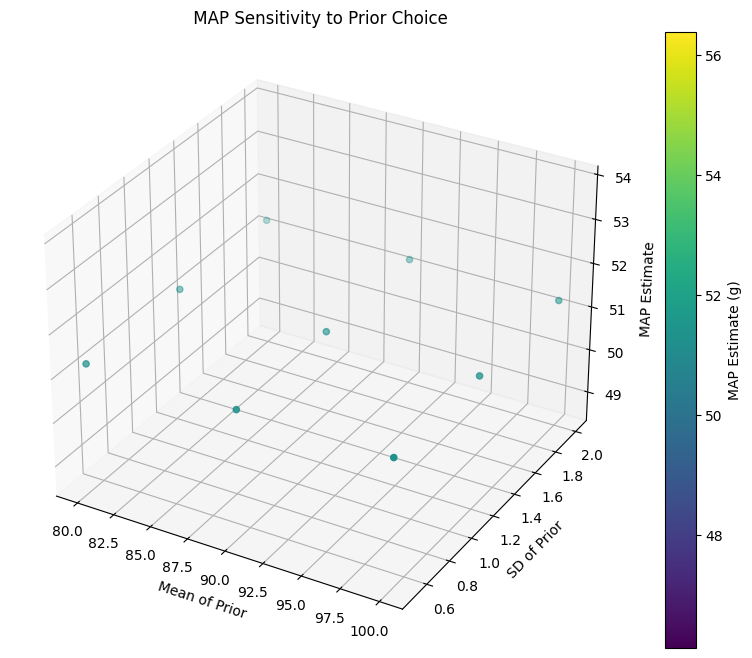

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

def calculate_log_prior_grid(mean, std):
    prior_weight = norm(mean, std).logpdf(WEIGHT_GUESSES)
    return np.add.outer(PRIOR_ERR, prior_weight)

def calculate_map_weights(mean_range, std_range):
    return [(mean, std, get_map(measurements, WEIGHT_GUESSES))
            for mean in mean_range for std in std_range]

mean_range_3d = np.linspace(80, 100, 3)
std_range_3d = np.linspace(0.5, 2, 3)

map_weights_3d = calculate_map_weights(mean_range_3d, std_range_3d)
means, stds, map_estimates = zip(*map_weights_3d)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(means, stds, map_estimates, c=map_estimates, cmap='viridis')
ax.set_xlabel('Mean of Prior')
ax.set_ylabel('SD of Prior')
ax.set_zlabel('MAP Estimate')
plt.title(' MAP Sensitivity to Prior Choice')
plt.colorbar(scatter, label='MAP Estimate (g)')
plt.show()


<h3><i><i> Questions</h3>
1.
How sensitive is the MAP measurement to the choice of prior?

The sensitivity of the Maximum A Posteriori (MAP) estimate to the choice of prior depends on the amount of data available and the strength of the prior. If there is a large amount of data that is strongly informative, the MAP estimate will be less sensitive to the prior, as the data will dominate the posterior. Conversely, with limited or weak data, the MAP estimate is more sensitive to the prior, as the prior has a greater influence on shaping the posterior distribution. In cases where prior knowledge is strong and data is scarce or noisy, the choice of prior can significantly impact the MAP estimate.

here in our case, The MAP estimate is different from the MLE estimate and the average measurement, highlighting the impact of the prior in Bayesian analysis. Adjusting the prior would similarly shift the MAP estimate.

<h3><i><i></h3>
2. How sensitive is the MLE and MAP answer to the grid size?



- **MLE Sensitivity**: MLE is generally less sensitive to grid size. Once a sufficiently fine grid is used, further refinement often brings marginal improvements.

- **MAP Sensitivity**: MAP can be more sensitive to grid size, especially when the prior significantly influences the estimate. A finer grid helps in accurately balancing the likelihood and the prior information, but there's also a point where further refinement yields minimal benefit.

in our case, MLE and MAP estimates' accuracy is affected by grid size. A larger grid offers finer resolution and potentially more accurate results, while a coarser grid might overlook the true value due to lower resolution. Balancing computational efficiency and grid resolution is key. With increasing grid size, both estimates tend to converge towards the true weight.